In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sanbercode/pendapatan_train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sanbercode/pendapatan_test.csv')
df_full = pd.concat([df, df_test])

id - id unique yang dimiliki setiap sample

Umur - umur yang dimiliki setiap sample

Kelas Pekerja - kelompok kelas pekerjaan masing-masing sample

Berat Akhir - berisi nilai akumulasi berdasarkan populasi, ras, dan gender dengan umur 16+ suatu wilayah, sample yang diambil dari wilayah yang memiliki karakteristik demografis yang sama akan memiliki nilai berat akhir yang sama

Pendidikan - tingkat pendidikan terakhir masing-masing sample

Jmlh Tahun Pendidikan - berisi jumlah tahun masing-masing sample mengenyam pendidikan

Status Perkawinan - status perkawinan masing-masing sample

Pekerjaan - pekerjaan saat ini masing-masing sample

Jenis Kelamin - jenis kelamin masing-masing sample

Keuntungan Kapital - keuntungan yang didapat jika sample menjual semua aset miliknya

Kerugian Kapital - kerugian yang didapat jika sample menjual semua aset miliknya

Jam per Minggu - jam kerja masing-masing sample setiap minggunya

Gaji - nilai gaji masing-masing sample apakah kurang dari sama dengan 7jt atau lebih dari 7jt

In [55]:
df.head(20)

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,40,Wiraswasta,205047,SMA,9,Menikah LDR,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,>7jt
1,1,33,Pemerintah Lokal,298785,10th,6,Cerai,Supir,Laki2,0.0,0.0,40.0,<=7jt
2,2,26,Wiraswasta,106856,D4,11,Belum Pernah Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0,<=7jt
3,3,54,Pekerja Bebas Perusahaan,117674,Sarjana,13,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
4,4,48,Wiraswasta,268234,SMA,9,Cerai,Perbaikan Kerajinan,Laki2,0.0,0.0,50.0,<=7jt
5,5,27,Pekerja Bebas Perusahaan,376936,SMA,9,Belum Pernah Menikah,Sales,Laki2,0.0,0.0,50.0,<=7jt
6,6,37,Pekerja Bebas Bukan Perusahan,168496,SMA,9,Cerai,Pembersih,Laki2,0.0,0.0,10.0,<=7jt
7,7,51,Wiraswasta,136080,SMA,9,Cerai,Sales,Perempuan,0.0,0.0,31.0,<=7jt
8,8,60,Wiraswasta,232242,SMA,9,Menikah,Sales,Laki2,0.0,0.0,40.0,<=7jt
9,9,44,Pemerintah Lokal,34935,Pendidikan Tinggi,10,Belum Pernah Menikah,Servis Lainnya,Laki2,0.0,0.0,40.0,<=7jt


#Explore Each Column


##Kelas Pekerja

In [56]:
#CEK KATEGORI DALAM KELAS PEKERJA
df['Kelas Pekerja'].unique()

array(['Wiraswasta', 'Pemerintah Lokal', 'Pekerja Bebas Perusahaan',
       'Pekerja Bebas Bukan Perusahan', 'Pemerintah Negara', '?',
       'Pemerintah Provinsi', 'Tanpa di Bayar', 'Tidak Pernah Bekerja'],
      dtype=object)

In [57]:
#URUTAN KELAS PEKERJA
a = df.loc[df['Gaji']=='>7jt']
a_ = a.groupby(['Kelas Pekerja'])[['Gaji']].count()
print(a_)
sorted(a_['Gaji'])

                               Gaji
Kelas Pekerja                      
?                               173
Pekerja Bebas Bukan Perusahan   623
Pekerja Bebas Perusahaan        561
Pemerintah Lokal                530
Pemerintah Negara               305
Pemerintah Provinsi             346
Tanpa di Bayar                    1
Wiraswasta                     4282


[1, 173, 305, 346, 530, 561, 623, 4282]

In [58]:
#MAPPING KELAS PEKERJA
kelas_dict = {'Wiraswasta': 7,
              'Pekerja Bebas Bukan Perusahan': 6,
              'Pekerja Bebas Perusahaan': 5,
              'Pemerintah Lokal': 4,
              'Pemerintah Provinsi': 3,
              'Pemerintah Negara': 2,
              '?': 1,
              'Tanpa di Bayar': 0,
              'Tidak Pernah Bekerja': 0
}
df['Kelas Pekerja'] = df['Kelas Pekerja'].replace(kelas_dict)
df_test['Kelas Pekerja'] = df_test['Kelas Pekerja'].replace(kelas_dict)
df_test['Kelas Pekerja']

0       3
1       7
2       7
3       7
4       7
       ..
9594    7
9595    7
9596    7
9597    7
9598    7
Name: Kelas Pekerja, Length: 9599, dtype: int64

##Pekerjaan

In [59]:
#CEK KATEGORI PEKERJAAN
df['Pekerjaan'].unique()

array(['Perbaikan Kerajinan', 'Supir', 'Pemuka Agama', 'Sales',
       'Pembersih', 'Servis Lainnya', 'Tech-support', 'Spesialis',
       'Ekesekutif Managerial', '?', 'Petani', 'Mesin Inspeksi',
       'Penjaga', 'Asisten Rumah Tangga', 'Tentara'], dtype=object)

In [60]:
#URUTAN PEKERJAAN
b = df.loc[df['Gaji']=='>7jt']
b_ = b.groupby(['Pekerjaan'])[['Gaji']].count()
print(b_)
sorted(b_['Gaji'])

                       Gaji
Pekerjaan                  
?                       173
Asisten Rumah Tangga      3
Ekesekutif Managerial  1698
Mesin Inspeksi          224
Pembersih                80
Pemuka Agama            466
Penjaga                 168
Perbaikan Kerajinan     764
Petani                   89
Sales                   853
Servis Lainnya          114
Spesialis              1653
Supir                   283
Tech-support            250
Tentara                   3


[3, 3, 80, 89, 114, 168, 173, 224, 250, 283, 466, 764, 853, 1653, 1698]

In [61]:
#MAPPING PEKERJAAN
pekerjaan_dict = {'Ekesekutif Managerial': 14,
              'Spesialis': 13,
              'Sales': 12,
              'Perbaikan Kerajinan': 11,
              'Pemerintah Provinsi': 10,
              'Pemuka Agama': 9,
              'Supir': 8,
              'Tech-support': 7,
              'Mesin Inspeksi': 6,
              '?': 5,
              'Penjaga': 4,
              'Servis Lainnya': 3,
              'Petani': 2,
              'Pembersih': 1,
              'Asisten Rumah Tangga': 0,
              'Tentara': 0
}
df['Pekerjaan'] = df['Pekerjaan'].replace(pekerjaan_dict)
df_test['Pekerjaan'] = df_test['Pekerjaan'].replace(pekerjaan_dict)
df_test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,28794,31,3,207301,SMA,9,Menikah,9,Perempuan,0.0,0.0,40.0
1,28795,34,7,324254,SMA,9,Menikah,6,Laki2,0.0,0.0,40.0
2,28796,58,7,27385,SMA,9,Menikah,14,Laki2,0.0,0.0,60.0
3,28797,49,7,723746,SMA,9,Menikah,11,Laki2,0.0,0.0,43.0
4,28798,60,7,194980,SMA,9,Berpisah,9,Perempuan,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,38388,54,7,297551,Pendidikan Tinggi,10,Menikah,11,Laki2,102172000.0,0.0,40.0
9595,38389,33,7,236396,Sarjana,13,Menikah,14,Laki2,210336000.0,0.0,55.0
9596,38390,24,7,83774,SMA,9,Menikah,3,Laki2,40390000.0,0.0,45.0
9597,38391,34,7,340458,SMA,9,Cerai,6,Perempuan,0.0,0.0,40.0


##Pendidikan

In [62]:
#CEK KATEGORI PENDIDIKAN
df['Pendidikan'].unique()

array(['SMA', '10th', 'D4', 'Sarjana', 'Pendidikan Tinggi', 'D3',
       '1st-4th', '5th-6th', '9th', '11th', 'Sekolah Professional',
       '12th', 'Master', '7th-8th', 'Doktor', 'SD'], dtype=object)

In [63]:
#CEK HUBUNGAN ANTARA KOLOM PENDIDIKAN DAN JMLH TAHUN PENDIDIKAN
df.loc[df['Pendidikan']=='SD']['Jmlh Tahun Pendidikan']

2575     1
2671     1
3001     1
3170     1
3393     1
3414     1
3519     1
5073     1
6062     1
6201     1
6756     1
6953     1
7306     1
7325     1
9173     1
9890     1
10120    1
11354    1
11590    1
11721    1
12321    1
13158    1
14329    1
14611    1
14769    1
15020    1
15031    1
15050    1
16954    1
17243    1
20775    1
22769    1
24336    1
25004    1
25634    1
25718    1
25868    1
26563    1
26851    1
27009    1
27222    1
27346    1
27983    1
Name: Jmlh Tahun Pendidikan, dtype: int64

In [64]:
df.loc[df['Pendidikan']=='1st-4th']['Jmlh Tahun Pendidikan']

18       2
183      2
315      2
489      2
516      2
        ..
27798    2
28266    2
28460    2
28467    2
28776    2
Name: Jmlh Tahun Pendidikan, Length: 147, dtype: int64

In [65]:
df.loc[df['Pendidikan']=='5th-6th']['Jmlh Tahun Pendidikan']

29       3
54       3
61       3
140      3
220      3
        ..
28255    3
28271    3
28366    3
28381    3
28487    3
Name: Jmlh Tahun Pendidikan, Length: 304, dtype: int64

In [66]:
df.loc[df['Pendidikan']=='11th']['Jmlh Tahun Pendidikan']

55       7
57       7
76       7
82       7
116      7
        ..
28731    7
28734    7
28745    7
28765    7
28768    7
Name: Jmlh Tahun Pendidikan, Length: 1063, dtype: int64

In [67]:
df.loc[df['Pendidikan']=='12th']['Jmlh Tahun Pendidikan']

72       8
108      8
158      8
193      8
278      8
        ..
28342    8
28384    8
28398    8
28595    8
28638    8
Name: Jmlh Tahun Pendidikan, Length: 375, dtype: int64

In [68]:
df.loc[df['Pendidikan']=='SMA']['Jmlh Tahun Pendidikan']

0        9
4        9
5        9
6        9
7        9
        ..
28780    9
28781    9
28785    9
28787    9
28792    9
Name: Jmlh Tahun Pendidikan, Length: 9360, dtype: int64

In [69]:
df.loc[df['Pendidikan']=='9th']['Jmlh Tahun Pendidikan']

32       5
99       5
111      5
295      5
310      5
        ..
28535    5
28560    5
28619    5
28624    5
28727    5
Name: Jmlh Tahun Pendidikan, Length: 459, dtype: int64

In [70]:
df.loc[df['Pendidikan']=='7th-8th']['Jmlh Tahun Pendidikan']

189      4
201      4
213      4
318      4
361      4
        ..
28515    4
28605    4
28655    4
28740    4
28746    4
Name: Jmlh Tahun Pendidikan, Length: 539, dtype: int64

In [71]:
df.loc[df['Pendidikan']=='10th']['Jmlh Tahun Pendidikan']

1        6
31       6
67       6
174      6
231      6
        ..
28576    6
28593    6
28696    6
28713    6
28726    6
Name: Jmlh Tahun Pendidikan, Length: 822, dtype: int64

In [72]:
#MAPPING PEKERJAAN DAN JMLH TAHUN PENDIDIKAN JADI SATU, NANTI KOLOM JMLH TAHUN PENDIDIKAN AKAN DIDROP
pendidikan_dict = {'1st-4th': 0,
                   '5th-6th': 0,
                   'SD': 0,
                   '7th-8th': 1,
                   '9th': 1,
                   '10th': 2,
                   '11th': 2,
                   '12th': 2,
                   'SMA': 2,
                   'D3': 3,
                   'D4':4, 
                   'Sarjana': 5,
                   'Pendidikan Tinggi': 5,
                   'Master': 6,
                   'Sekolah Professional': 7,
                   'Doktor':8
}
df['Pendidikan'] = df['Pendidikan'].replace(pendidikan_dict)
df_test['Pendidikan'] = df_test['Pendidikan'].replace(pendidikan_dict)
df_test['Pendidikan']

0       2
1       2
2       2
3       2
4       2
       ..
9594    5
9595    5
9596    2
9597    2
9598    2
Name: Pendidikan, Length: 9599, dtype: int64

In [73]:
df['Pendidikan']

0        2
1        2
2        4
3        5
4        2
        ..
28789    5
28790    5
28791    5
28792    2
28793    5
Name: Pendidikan, Length: 28794, dtype: int64

##Umur

In [74]:
umur_label=['a','b','c','d','e','f']
df['kategori umur']=pd.qcut(x=df['Umur'], q=6, labels=umur_label)
df_test['kategori umur']=pd.qcut(x=df_test['Umur'], q=6,labels=umur_label)
df[['kategori umur','Gaji']].groupby(['kategori umur'], as_index=False).count()

,kategori umur,Gaji
0,a,5058
1,b,5086
2,c,4618
3,d,4854
4,e,4401
5,f,4777


In [75]:
umur_dict ={
    'a':0,
    'b':1,
    'c':2,
    'd':3,
    'e':4,
    'f':5
}
df['kategori umur']=df['kategori umur'].replace(umur_dict)
df_test['kategori umur']=df_test['kategori umur'].replace(umur_dict)
df_test['kategori umur']

0       1
1       2
2       5
3       4
4       5
       ..
9594    5
9595    2
9596    0
9597    2
9598    5
Name: kategori umur, Length: 9599, dtype: int64

##Jam Per Minggu

In [76]:
#Jam per Minggu
label_jam = ['a','b','c','d']
df['kategori jam'] = pd.qcut(x=df['Jam per Minggu'], q=5, duplicates='drop', labels=label_jam)
df_test['kategori jam'] = pd.qcut(x=df_test['Jam per Minggu'], q=5, duplicates='drop',labels=label_jam)
df[['kategori jam','Gaji']].groupby(['kategori jam'], as_index=False).count()

,kategori jam,Gaji
0,a,6114
1,b,14316
2,c,2706
3,d,5658


In [77]:
jam_dict ={
    'a':0,
    'b':1,
    'c':2,
    'd':3,
}
df['kategori jam']=df['kategori jam'].replace(jam_dict)
df_test['kategori jam']=df_test['kategori jam'].replace(umur_dict)
df_test['kategori jam']

0       1
1       1
2       3
3       2
4       0
       ..
9594    1
9595    3
9596    2
9597    1
9598    1
Name: kategori jam, Length: 9599, dtype: int64

##Gaji

In [78]:
df['Gaji']=df['Gaji'].replace({'<=7jt': 0, '>7jt': 1})
df['Gaji']

0        1
1        0
2        0
3        1
4        0
        ..
28789    1
28790    0
28791    0
28792    0
28793    0
Name: Gaji, Length: 28794, dtype: int64

##Cek Tipe Data

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28794 entries, 0 to 28793
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     28794 non-null  int64  
 1   Umur                   28794 non-null  int64  
 2   Kelas Pekerja          28794 non-null  int64  
 3   Berat Akhir            28794 non-null  int64  
 4   Pendidikan             28794 non-null  int64  
 5   Jmlh Tahun Pendidikan  28794 non-null  int64  
 6   Status Perkawinan      28794 non-null  object 
 7   Pekerjaan              28794 non-null  int64  
 8   Jenis Kelamin          28794 non-null  object 
 9   Keuntungan Kapital     28794 non-null  float64
 10  Kerugian Capital       28794 non-null  float64
 11  Jam per Minggu         28794 non-null  float64
 12  Gaji                   28794 non-null  int64  
 13  kategori umur          28794 non-null  int64  
 14  kategori jam           28794 non-null  int64  
dtypes:

In [80]:
df_test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,kategori umur,kategori jam
0,28794,31,3,207301,2,9,Menikah,9,Perempuan,0.0,0.0,40.0,1,1
1,28795,34,7,324254,2,9,Menikah,6,Laki2,0.0,0.0,40.0,2,1
2,28796,58,7,27385,2,9,Menikah,14,Laki2,0.0,0.0,60.0,5,3
3,28797,49,7,723746,2,9,Menikah,11,Laki2,0.0,0.0,43.0,4,2
4,28798,60,7,194980,2,9,Berpisah,9,Perempuan,0.0,0.0,20.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,38388,54,7,297551,5,10,Menikah,11,Laki2,102172000.0,0.0,40.0,5,1
9595,38389,33,7,236396,5,13,Menikah,14,Laki2,210336000.0,0.0,55.0,2,3
9596,38390,24,7,83774,2,9,Menikah,3,Laki2,40390000.0,0.0,45.0,0,2
9597,38391,34,7,340458,2,9,Cerai,6,Perempuan,0.0,0.0,40.0,2,1


In [81]:
df['Keuntungan Kapital'] = df['Keuntungan Kapital'].astype('int')
df_test['Keuntungan Kapital'] = df_test['Keuntungan Kapital'].astype('int')

df['Kerugian Capital'] = df['Kerugian Capital'].astype('int')
df_test['Kerugian Capital'] = df_test['Kerugian Capital'].astype('int')

##Definisi X dan y

In [82]:
X = df.drop(['id','Kelas Pekerja','Berat Akhir','Umur','Jam per Minggu','Jmlh Tahun Pendidikan','Gaji','Keuntungan Kapital','Kerugian Capital'], axis='columns')
Xtest = df_test.drop(['id','Umur','Kelas Pekerja','Berat Akhir','Jam per Minggu','Jmlh Tahun Pendidikan','Keuntungan Kapital','Kerugian Capital'], axis='columns')
y = df['Gaji']

In [83]:
X

,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,kategori umur,kategori jam
0,2,Menikah LDR,11,Laki2,3,1
1,2,Cerai,8,Laki2,2,1
2,4,Belum Pernah Menikah,9,Perempuan,1,1
3,5,Menikah,12,Laki2,5,1
4,2,Cerai,11,Laki2,4,3
...,...,...,...,...,...,...
28789,5,Menikah,14,Laki2,3,3
28790,5,Belum Pernah Menikah,9,Perempuan,2,1
28791,5,Cerai,6,Laki2,5,3
28792,2,Menikah,8,Laki2,3,2


In [84]:
Xtest

,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,kategori umur,kategori jam
0,2,Menikah,9,Perempuan,1,1
1,2,Menikah,6,Laki2,2,1
2,2,Menikah,14,Laki2,5,3
3,2,Menikah,11,Laki2,4,2
4,2,Berpisah,9,Perempuan,5,0
...,...,...,...,...,...,...
9594,5,Menikah,11,Laki2,5,1
9595,5,Menikah,14,Laki2,2,3
9596,2,Menikah,3,Laki2,0,2
9597,2,Cerai,6,Perempuan,2,1


#One Hot Encoding

In [85]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#Column Transformer
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Status Perkawinan','Jenis Kelamin']),
                       remainder='passthrough')
X=column_trans.fit_transform(X)
Xtest=column_trans.fit_transform(Xtest)

In [86]:
X = pd.DataFrame(X)
Xtest = pd.DataFrame(Xtest)
Xtest

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,9.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,6.0,2.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,14.0,5.0,3.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,11.0,4.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,11.0,5.0,1.0
9595,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,14.0,2.0,3.0
9596,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0
9597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,1.0


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


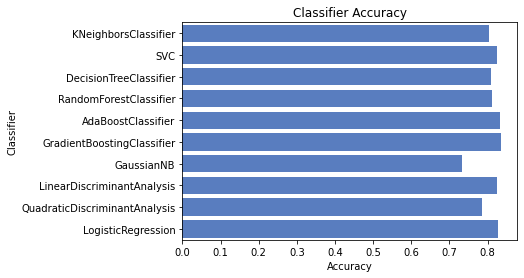

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

# for train_index, test_index in sss.split(X, y):
# 	X_train, X_test = X[train_index], X[test_index]
# 	y_train, y_test = y[train_index], y[test_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
	
for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf]
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

#Hyperparameter Tuning

In [88]:
#Gradient Boosting Classifier

import numpy as np
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {'max_depth': np.arange(2,9)}
gscv = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')

gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [89]:
gscv.best_params_

{'max_depth': 4}

In [90]:
gscv.best_score_

0.8857076000314237

In [91]:
model = GradientBoostingClassifier(max_depth=4)
model.fit(X, y)
y_pred = model.predict(Xtest)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,1
3,0
4,0
...,...
9594,1
9595,1
9596,0
9597,0


In [92]:
df_test['prediction']=y_pred
df_test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,kategori umur,kategori jam,prediction
0,28794,31,3,207301,2,9,Menikah,9,Perempuan,0,0,40.0,1,1,0
1,28795,34,7,324254,2,9,Menikah,6,Laki2,0,0,40.0,2,1,0
2,28796,58,7,27385,2,9,Menikah,14,Laki2,0,0,60.0,5,3,1
3,28797,49,7,723746,2,9,Menikah,11,Laki2,0,0,43.0,4,2,0
4,28798,60,7,194980,2,9,Berpisah,9,Perempuan,0,0,20.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,38388,54,7,297551,5,10,Menikah,11,Laki2,102172000,0,40.0,5,1,1
9595,38389,33,7,236396,5,13,Menikah,14,Laki2,210336000,0,55.0,2,3,1
9596,38390,24,7,83774,2,9,Menikah,3,Laki2,40390000,0,45.0,0,2,0
9597,38391,34,7,340458,2,9,Cerai,6,Perempuan,0,0,40.0,2,1,0


#Create Submission

In [93]:
df_test_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sanbercode/pendapatan_test.csv')
df_test_submission

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,28794,31,Pemerintah Provinsi,207301,SMA,9,Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,28795,34,Wiraswasta,324254,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,40.0
2,28796,58,Wiraswasta,27385,SMA,9,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,60.0
3,28797,49,Wiraswasta,723746,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,43.0
4,28798,60,Wiraswasta,194980,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,38388,54,Wiraswasta,297551,Pendidikan Tinggi,10,Menikah,Perbaikan Kerajinan,Laki2,102172000.0,0.0,40.0
9595,38389,33,Wiraswasta,236396,Sarjana,13,Menikah,Ekesekutif Managerial,Laki2,210336000.0,0.0,55.0
9596,38390,24,Wiraswasta,83774,SMA,9,Menikah,Servis Lainnya,Laki2,40390000.0,0.0,45.0
9597,38391,34,Wiraswasta,340458,SMA,9,Cerai,Mesin Inspeksi,Perempuan,0.0,0.0,40.0


In [94]:
submission = pd.DataFrame(df_test_submission['id'])
submission

,id
0,28794
1,28795
2,28796
3,28797
4,28798
...,...
9594,38388
9595,38389
9596,38390
9597,38391


In [95]:
submission['gaji'] = df_test['prediction']
submission

,id,gaji
0,28794,0
1,28795,0
2,28796,1
3,28797,0
4,28798,0
...,...,...
9594,38388,1
9595,38389,1
9596,38390,0
9597,38391,0


In [96]:
submission.to_csv('submission_gbc_hapussemua.csv', index=False)